## Face Detection using Opencv

In [116]:
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder


In [141]:
def FaceDetection(image):
    ## Convert image from one colour space to another colour space
    img2gray = cv2.cvtColor(src=image, code = cv2.COLOR_BGR2GRAY,)
    
    ## Load classifier to detect faces from a image
    haar_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    ## Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.
    faces = haar_cascade.detectMultiScale(img2gray, scaleFactor=1.05, minNeighbors=5)
    
    return faces, img2gray

def Draw_Bounding_Box(image, face_, confidence, text="person"):
    (x, y, w, h) = face_
    cv2.rectangle(image, (x,y), (x+w, y+h),(255,0,0), 2)
    cv2.putText(image, text,(x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    
def load_dataset(directory):
    faceID = []
    faces = []
    for path, subdirectory, filenames in os.walk(directory):
        for filename in filenames:
            id = os.path.basename(path)
            img_path = os.path.join(path, filename)
    #         print(img_path)
            img = cv2.imread(img_path, )
            if img is None:
                continue
            faces_rect, gray_img = FaceDetection(img)
            if len(faces_rect) != 1:
                continue
            (x, y, w, h) = faces_rect[0]
            cropped_img = gray_img[y:y+h, x:x+w]
            
            mean, std = cropped_img.mean(), cropped_img.std()
            cropped_img = (cropped_img-mean)/std
            cropped_img = cv2.resize(cropped_img, (500,500))
            faces.append(cropped_img)
            faceID.append(id)
    print(f"total {len(faceID)} Images has been loaded ")
    return faces, faceID


def train_classifier(faces, face_id):
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.train(faces, face_id)
    return recognizer

In [142]:
train_img, labels = load_dataset("C://Users//Sunny//Work on python//ClassRoom//Face_Recognization_and_Detection//5-celebrity-faces-dataset//data//train")
test_img,test_label= load_dataset("C://Users//Sunny//Work on python//ClassRoom//Face_Recognization_and_Detection//5-celebrity-faces-dataset//data//val")

le = LabelEncoder()
labels = le.fit_transform(labels)

## Classifier training
classifier = train_classifier(train_img, labels)
classifier.save("opencv_5celebrity.yml")



total 63 Images has been loaded 
total 22 Images has been loaded 


In [143]:
## Load the trained classifer

In [144]:
classifier = cv2.face.LBPHFaceRecognizer_create()
classifier.read("opencv_5celebrity.yml")

In [145]:
tstimg = test_img[16]

tstlabel = test_label[16]

tstlabel, tstimg.shape

('madonna', (500, 500))

Text(0.5, 1.0, 'mindy_kaling 28.327500974837086 ')

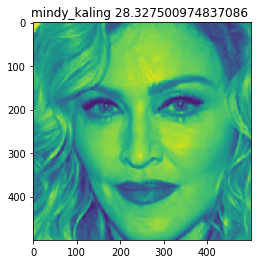

In [146]:
lbl, confidence = classifier.predict(tstimg)
prdicted_name = le.inverse_transform([lbl])[0]

import matplotlib.pyplot as plt

plt.imshow(tstimg)
plt.title(f"{prdicted_name } { confidence } ")

In [134]:
madonna = cv2.imread("C://Users//Sunny//Work on python//ClassRoom//Face_Recognization_and_Detection//5-celebrity-faces-dataset//data//val//madonna//httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg")
madonna.shape

(300, 300, 3)

In [135]:
faces, gry_img = FaceDetection(madonna)
faces

array([[ 74,  96, 134, 134]], dtype=int32)

In [136]:
for face in faces:
    (x, y, h, w) = face
    cropped_img = gry_img[y:y+h, x:x+w]
    mean, std = cropped_img.mean(), cropped_img.std()
    cropped_img = (cropped_img - mean) / std
    label,confidence = classifier.predict(cropped_img)
    predicted_name = le.inverse_transform([label])[0]
    Draw_Bounding_Box(madonna, face, confidence, predicted_name)

In [137]:
resized = cv2.resize(madonna, (500,500))
cv2.imshow("",resized)
cv2.waitKey(0)

-1